# Uber EDA and Miles Predictions

At first lets look basic informations about dataset

In [185]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# import data
uber = pd.read_csv("UberDataset.csv")
uber = uber.drop(1155, axis=0)

In [187]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [188]:
uber.shape

(1155, 7)

In [189]:
#basic info about dataset
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [190]:
uber.CATEGORY.value_counts() #category imbalance

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [191]:
print(f"Unique startpoints - {uber.START.nunique()}")
print(f"Unique endpoints - {uber.STOP.nunique()}")

Unique startpoints - 177
Unique endpoints - 188


In [192]:
#convert dates to dataframe for next performs
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'])
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'])

#collect hour of start date
uber['TIME_DAY'] = uber['START_DATE'].apply(lambda i : i.hour)

#collect month of start date
uber['MONTH'] = uber['START_DATE'].apply(lambda i : i.month)

#collect day of week of start date
uber['DAY_OF_THE_RIDE'] = uber['START_DATE'].apply(lambda i : i.weekday())

#find duration of trip in minutes
uber['DURATION'] = (uber['END_DATE'] - uber['START_DATE']).astype('timedelta64[m]')

In [193]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,MONTH,DAY_OF_THE_RIDE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,1,5,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2,67.0


In [194]:
#fill all NaN values to UNKNOWN like it in START&STOP
uber['PURPOSE'] = uber['PURPOSE'].fillna("UNKNOWN")

uber['CATEGORY'] = uber['CATEGORY'].astype('category')

In [195]:
uber.MILES.describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

In [196]:
uber.PURPOSE.value_counts()

UNKNOWN            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

### Lest look at all NaN values that are in "PURPOSE"

In [101]:
uber_nan = uber.loc[uber['PURPOSE'] == 'UNKNOWN']
uber_nan

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,MONTH,DAY_OF_THE_RIDE,DURATION
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,1,5,12.0
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,UNKNOWN,9,1,1,14.0
85,2016-02-09 10:54:00,2016-02-09 11:07:00,Personal,Whitebridge,Northwoods,5.3,UNKNOWN,10,2,1,13.0
86,2016-02-09 11:43:00,2016-02-09 11:50:00,Personal,Northwoods,Tanglewood,3.0,UNKNOWN,11,2,1,7.0
87,2016-02-09 13:36:00,2016-02-09 13:52:00,Personal,Tanglewood,Preston,5.1,UNKNOWN,13,2,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,2016-12-19 14:18:00,2016-12-19 14:32:00,Business,Unknown Location,Unknown Location,5.3,UNKNOWN,14,12,0,14.0
1066,2016-12-19 14:37:00,2016-12-19 14:50:00,Business,Unknown Location,Unknown Location,5.4,UNKNOWN,14,12,0,13.0
1069,2016-12-19 19:05:00,2016-12-19 19:17:00,Business,Islamabad,Unknown Location,2.2,UNKNOWN,19,12,0,12.0
1071,2016-12-20 08:49:00,2016-12-20 09:24:00,Business,Unknown Location,Rawalpindi,12.0,UNKNOWN,8,12,1,35.0


In [106]:
#and some information about Miles and Duration
uber_nan[['MILES', 'DURATION']].describe()

,MILES,DURATION
count,502.000000,502.000000
mean,9.748008,23.041833
std,19.590247,29.235233
min,0.600000,0.000000
25%,2.300000,9.000000
50%,5.000000,15.000000
75%,10.475000,27.000000
max,195.900000,336.000000


In [197]:
uber_no_nan = uber.loc[uber['PURPOSE'] != 'UNKNOWN']
uber_no_nan

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,MONTH,DAY_OF_THE_RIDE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,12,5,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,12,5,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,12,5,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,12,5,18.0


In [198]:
uber_no_nan[['MILES', 'DURATION']].describe()

,MILES,DURATION
count,653.000000,653.000000
mean,11.196325,23.398162
std,22.986429,25.769640
min,0.500000,2.000000
25%,3.200000,11.000000
50%,6.400000,18.000000
75%,10.400000,28.000000
max,310.300000,330.000000


## Vizualize Data

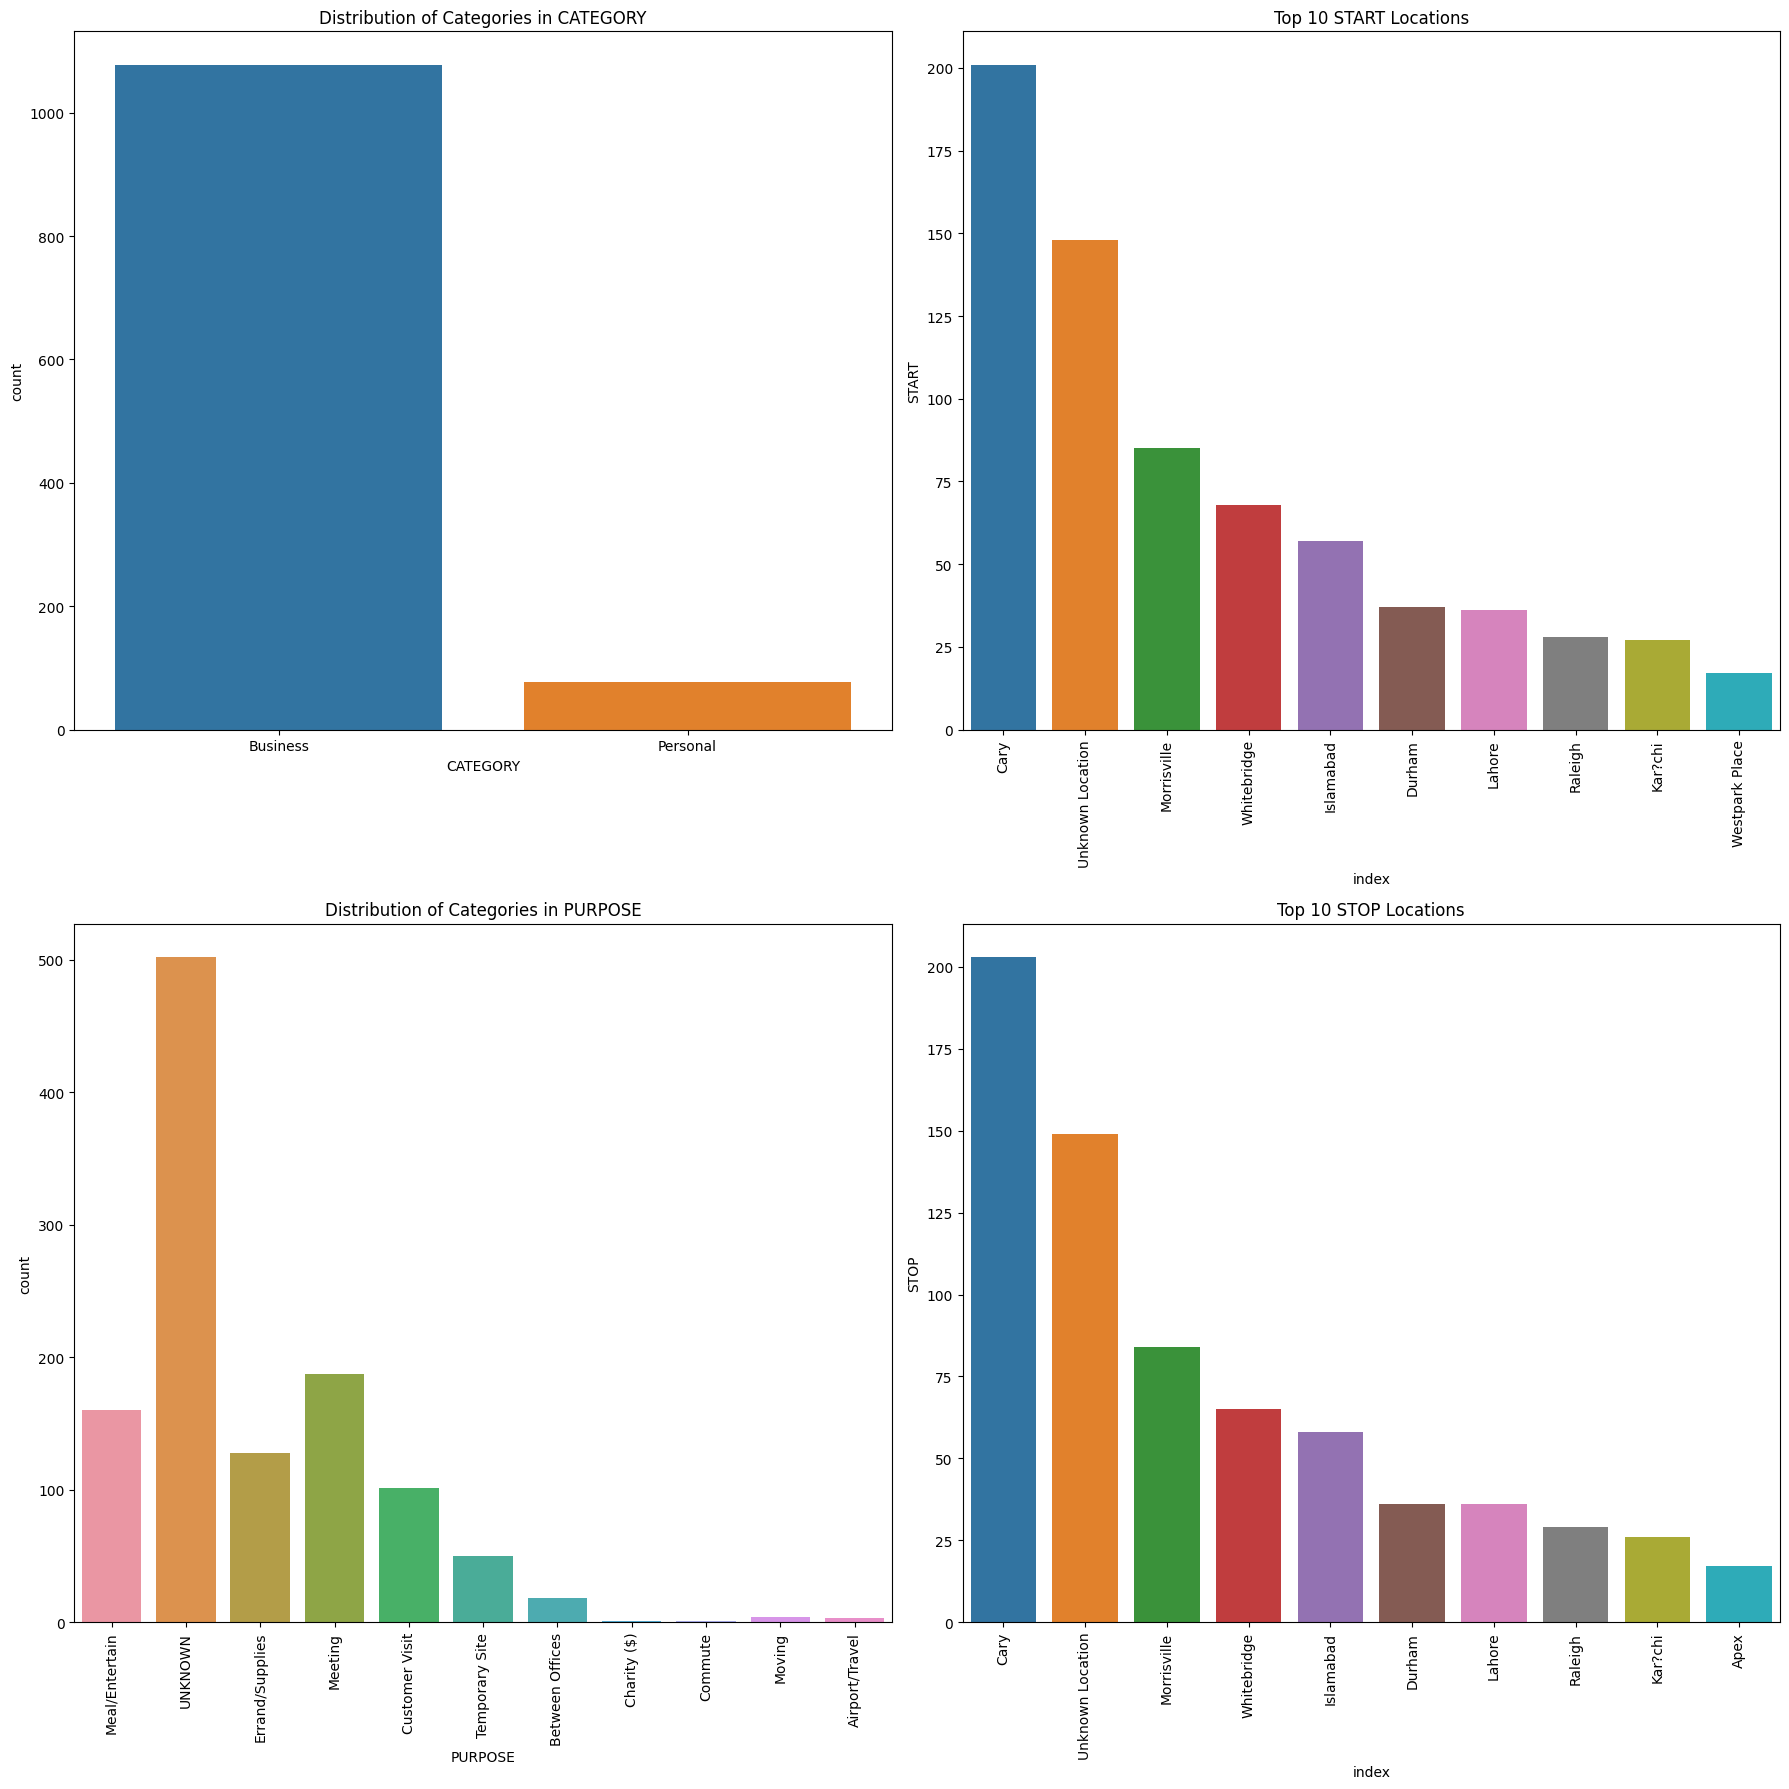

In [199]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

sns.countplot(data=uber, x='CATEGORY', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')

sns.countplot(data=uber, x='PURPOSE', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation=90)

temp = uber['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='START', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation=90)

temp = uber['STOP'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='STOP', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Now let's take a look at what time the trips mostly start.

you can see that these trips take place in the afternoon and evening, and start just as people are hurrying to work.

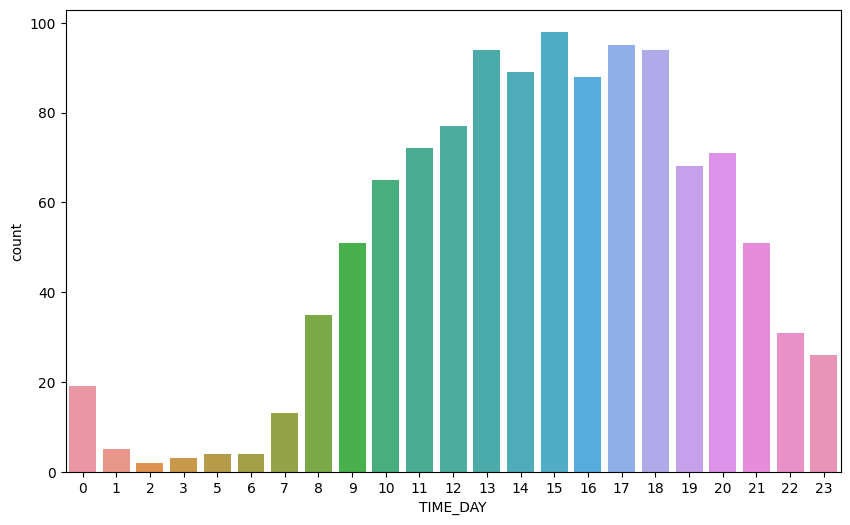

In [200]:
plt.figure(figsize=(10, 6))
sns.countplot(data=uber, x='TIME_DAY')
plt.show()

Let's do the same thing with months

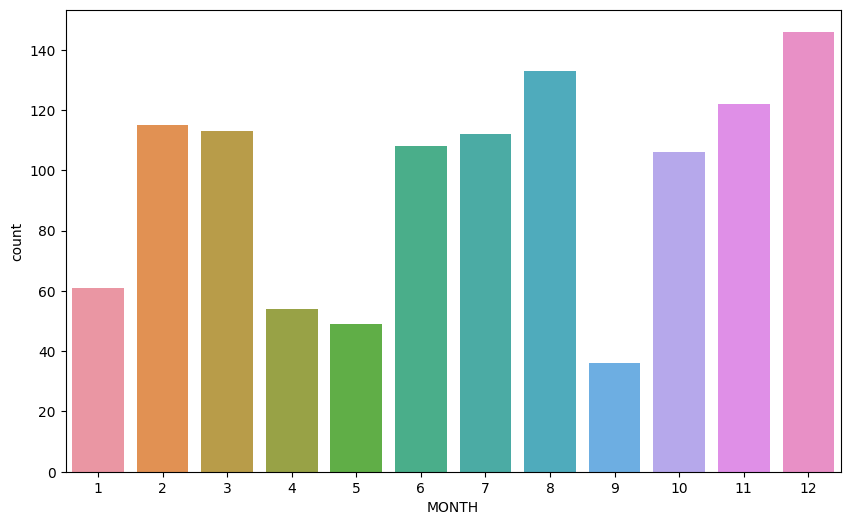

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=uber, x='MONTH')
plt.show()

And with the days of the week

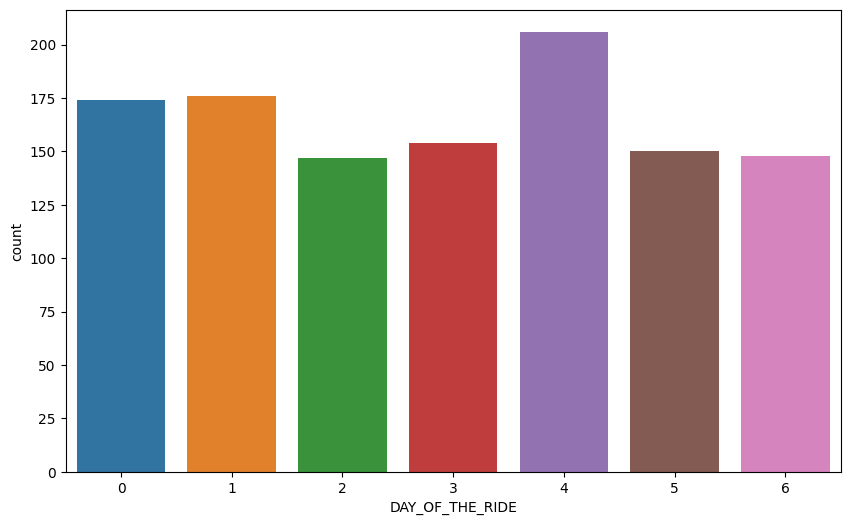

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=uber, x='DAY_OF_THE_RIDE')
plt.show()

let's write a function that gives us the distribution by the number of trips on a certain day of the week

In [201]:
def plot_by_day(day):
    day_uber = uber.loc[uber['DAY_OF_THE_RIDE'] == day]

    plt.figure(figsize=(10, 6))
    sns.countplot(data=day_uber, x='TIME_DAY')
    plt.show()

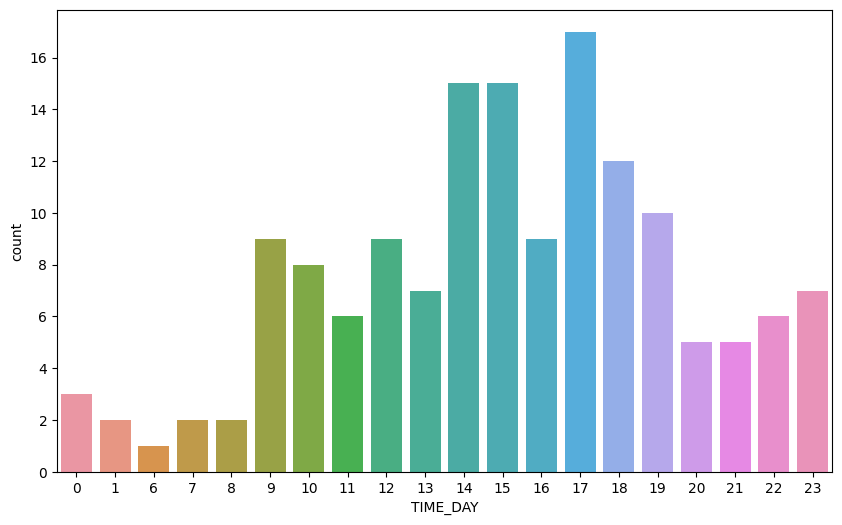

In [203]:
plot_by_day(5)

Output the trip purpose diagram

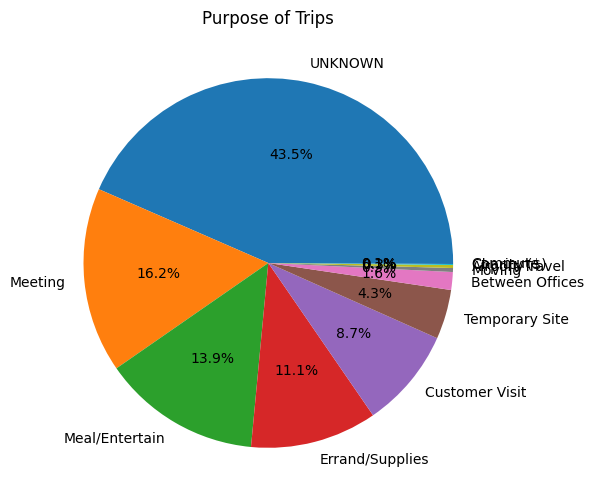

In [204]:
purpose_counts = uber['PURPOSE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Purpose of Trips')
plt.show()

### Now let's do a little travel analysis by category. To do this, we will see a boxplot for each diagram

we see that even though the values of quartiles are similar, business trips are still mostly for longer trips

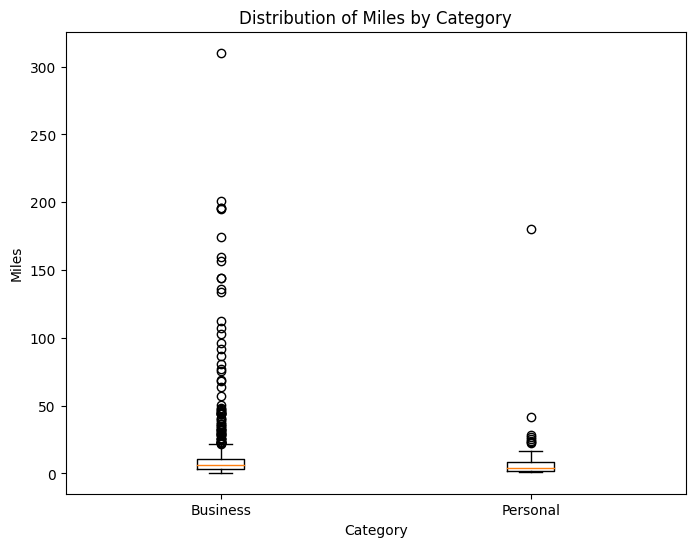

In [205]:
plt.figure(figsize=(8, 6))
plt.boxplot([uber[uber['CATEGORY'] == 'Business']['MILES'], uber[uber['CATEGORY'] == 'Personal']['MILES']], labels=['Business', 'Personal'])
plt.xlabel('Category')
plt.ylabel('Miles')
plt.title('Distribution of Miles by Category')
plt.show()

#### we're gonna take out all business trips between 100 and 200.

In [206]:
uber.loc[(uber['MILES'] > 100) & (uber['MILES'] < 200) & (uber['CATEGORY'] == 'Business')]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,MONTH,DAY_OF_THE_RIDE,DURATION
232,2016-03-17 12:52:00,2016-03-17 15:11:00,Business,Austin,Katy,136.0,Customer Visit,12,3,3,139.0
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144.0,Customer Visit,13,3,4,178.0
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174.2,Customer Visit,19,4,5,178.0
298,2016-04-02 23:11:00,2016-04-03 01:34:00,Business,Ridgeland,Florence,144.0,Meeting,23,4,5,143.0
299,2016-04-03 02:00:00,2016-04-03 04:16:00,Business,Florence,Cary,159.3,Meeting,2,4,6,136.0
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,UNKNOWN,16,7,3,206.0
727,2016-08-27 16:15:00,2016-08-27 19:13:00,Business,Unknown Location,Unknown Location,156.9,UNKNOWN,16,8,5,178.0
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,UNKNOWN,21,9,1,336.0
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,112.6,UNKNOWN,17,10,3,17.0
869,2016-10-28 15:53:00,2016-10-28 17:59:00,Business,Cary,Winston Salem,107.0,Meeting,15,10,4,126.0


1. Based on the dataset, we can see that these are mostly personal meetings or visits.
2. You can also see that these are inter-city visits. For example, line 870 is from Winston Salem to Asheville.
3. Such trips are always long, which is why users prefer the Business category.
4. Also by the TIME_DAY column we can say that these trips are mostly day and evening.

#### Now the same for the Personnel category

In [141]:
uber.loc[(uber['MILES'] > 10) & (uber['MILES'] < 50) & (uber['CATEGORY'] == 'Personal')].head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,MONTH,DAY_OF_THE_RIDE,DURATION
134,2016-02-19 20:08:00,2016-02-19 20:30:00,Personal,Islamabad,Unknown Location,13.6,UNKNOWN,20,2,4,22.0
136,2016-02-20 07:59:00,2016-02-20 08:32:00,Personal,Unknown Location,Islamabad,14.4,UNKNOWN,7,2,5,33.0
141,2016-02-20 16:59:00,2016-02-20 17:54:00,Personal,R?walpindi,Unknown Location,16.5,UNKNOWN,16,2,5,55.0
236,2016-03-17 20:57:00,2016-03-17 21:28:00,Personal,Houston,Houston,12.6,UNKNOWN,20,3,3,31.0
237,2016-03-17 21:48:00,2016-03-17 22:04:00,Personal,Sharpstown,Midtown,10.4,UNKNOWN,21,3,3,16.0
280,2016-03-28 19:30:00,2016-03-28 20:23:00,Personal,Couples Glen,Vista East,27.2,UNKNOWN,19,3,0,53.0
281,2016-03-28 22:55:00,2016-03-28 23:26:00,Personal,Orlando,Kissimmee,25.7,UNKNOWN,22,3,0,31.0
282,2016-03-29 15:27:00,2016-03-29 16:11:00,Personal,Kissimmee,Orlando,13.6,UNKNOWN,15,3,1,44.0
285,2016-03-29 23:04:00,2016-03-29 23:21:00,Personal,Orlando,Kissimmee,13.8,UNKNOWN,23,3,1,17.0
541,2016-07-13 12:39:00,2016-07-13 13:20:00,Personal,Cary,Morrisville,23.5,UNKNOWN,12,7,2,41.0


1. Personal trips are generally of shorter duration due to travel within cities or regions (Example - line 281).
2. These trips take place either in the middle of the day or already in the evening, which may be due to either a simple trip home or an urgent trip.

# Predic miles using ML

In [180]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.5 MB/s eta 0:00:00


In [181]:
################################___MODEL_TRAINING___################################

from sklearn.model_selection import train_test_split #for splitting data

#Since we have a regression problem, the main metrics will be - MAE, MSE and R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler #for preprocessing data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#all models used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb

In [149]:
#Let's look at our dataset again
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,MONTH,DAY_OF_THE_RIDE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,1,5,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2,67.0


We dont need columns like "START_DATE" and "END_DATE" because all info we took in preprocessing.

In [169]:
X, y = uber.drop(['MILES', 'START_DATE', 'END_DATE'], axis = 1), uber['MILES']

In [170]:
numerical_cols = ['TIME_DAY', 'MONTH', 'DAY_OF_THE_RIDE', 'DURATION']
categorical_features = ['CATEGORY', 'START', 'STOP', 'PURPOSE']

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())]) # Scale numerical data to have mean=0 and variance=1
categorical_transformer =  Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]) #onehoting categorical features

combined = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_features)],
        remainder='passthrough')

X_transformed = combined.fit_transform(X)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1706) #split data

In [183]:
#define dict with our models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
}

#df for results
evaluation_df = pd.DataFrame({
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R-squared': []
})

#train our models
for name, model in models.items():

    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    print(f"{name} training is finished")
    print("~"*20)
    print("\n")

    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r_squared = r2_score(y_test, pred)

    evaluation_df = evaluation_df.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R-squared': r_squared
    }, ignore_index=True)


Linear Regression training is finished
~~~~~~~~~~~~~~~~~~~~


Decision Tree training is finished
~~~~~~~~~~~~~~~~~~~~




<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({


Random Forest training is finished
~~~~~~~~~~~~~~~~~~~~


SVR training is finished
~~~~~~~~~~~~~~~~~~~~


XGBoost training is finished
~~~~~~~~~~~~~~~~~~~~




<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({


LightGBM training is finished
~~~~~~~~~~~~~~~~~~~~




<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({


Gradient Boosting Regressor training is finished
~~~~~~~~~~~~~~~~~~~~


ADA Boost training is finished
~~~~~~~~~~~~~~~~~~~~


Linear SVR training is finished
~~~~~~~~~~~~~~~~~~~~




<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-183-fddd11a98a72>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({


In [184]:
#print results
evaluation_df

,Model,MSE,MAE,R-squared
0,Linear Regression,342.385935,6.602412,0.516833
1,Decision Tree,215.786537,5.399567,0.695487
2,Random Forest,77.461568,3.686878,0.890688
3,SVR,658.539953,6.882846,0.070683
4,XGBoost,82.968912,3.751851,0.882916
5,LightGBM,162.366676,4.673704,0.770872
6,Gradient Boosting Regressor,85.841437,4.033091,0.878862
7,ADA Boost,229.740853,12.851109,0.675795
8,Linear SVR,322.643393,5.310890,0.544693


# The ideal value of MAE/MSE is 0, R2 is 1

### With these values we have two winners:
# 1 - Random Forest
## 2 - XGBoost

So let's upgrade the regular version of the random forest. maybe we can improve the results

In [208]:

from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor() #define model

rf_pipeline = Pipeline([
    ('preprocess', combined),
    ('random_forest', rf_model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1706) #split data

# Define the parameter grid for grid search
param_grid = {
    'random_forest__n_estimators': [50, 100, 150],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation using RandomForestRegressor
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model from grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

pred_best = best_model.predict(X_test)

# Evaluate the best model using MSE, MAE, and R-squared metrics
mse_best = mean_squared_error(y_test, pred_best)
mae_best = mean_absolute_error(y_test, pred_best)
r2_best = r2_score(y_test, pred_best)

evaluation_df = pd.DataFrame({
    'Model': [best_model.named_steps['random_forest'].__class__.__name__],
    'MSE': [mse_best],
    'MAE': [mae_best],
    'R-squared': [r2_best]
})

print("Best Parameters:", best_params)
print("Best Model:", best_model.named_steps['random_forest'].__class__.__name__)
print(evaluation_df)

Best Parameters: {'random_forest__max_depth': 10, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}
Best Model: RandomForestRegressor
                   Model        MSE       MAE  R-squared
0  RandomForestRegressor  80.270532  3.825142   0.886724


## It didn't come out much, but maybe you can improve the results by choosing other parameters :)